In [73]:
import pyworld
from scipy.io import wavfile

import IPython
from IPython.display import Audio

import matplotlib.pyplot as plt
import numpy as np
import pysptk

import os

import tqdm

from nnmnkwii.preprocessing.alignment import DTWAligner
from nnmnkwii.metrics import melcd

import math
import cmath


In [60]:
DATASET_PATH = "../../../datasets/cmu_artic"
EXAMPLE_EXT = "/cmu_us_clb_arctic/wav/arctic_a0001.wav"

Sampling frequency:  16000
58960


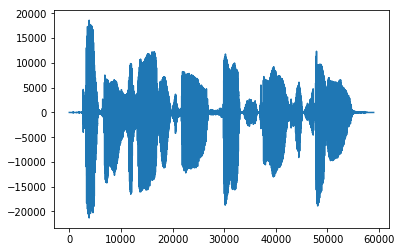

In [61]:
sampling_frequency, data = wavfile.read(DATASET_PATH + EXAMPLE_EXT)
IPython.display.display(Audio(data, rate = sampling_frequency))
plt.plot(data)
print("Sampling frequency: ", sampling_frequency)
print(data.size)

In [70]:
# split data
sample = []
for i in range(0, data.size, 160):
#     if (i + 400 > )
    s = data[i:i+400]
    
    sample.append(s)
    
sample = sample[: len(sample) - 3]
sample = np.array(sample, dtype=np.csingle)

print(sample.size)
print(sample[0].size)
print(sample)

146400
400
[[  0.+0.j   0.+0.j  -2.+0.j ...  -3.+0.j   2.+0.j   2.+0.j]
 [  4.+0.j   0.+0.j   1.+0.j ...   2.+0.j  -2.+0.j   1.+0.j]
 [ -2.+0.j  -2.+0.j   0.+0.j ...  19.+0.j -34.+0.j  23.+0.j]
 ...
 [  4.+0.j   5.+0.j   4.+0.j ...   1.+0.j   0.+0.j   1.+0.j]
 [ -2.+0.j  -2.+0.j  -2.+0.j ...  -2.+0.j  -3.+0.j  -1.+0.j]
 [ -1.+0.j  -1.+0.j  -1.+0.j ...   2.+0.j  -3.+0.j   2.+0.j]]


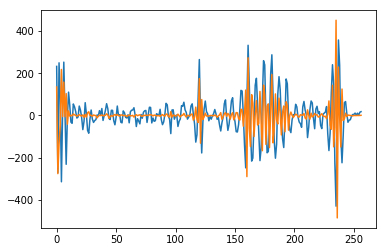

In [98]:
# discrete fourier transform
sample_S = []
sample_P = []

for i in range(0, 5):
    # each 400 points
    S_i = []
    P_i = []
#     for k in range(0, 257):
#         curr_S_i = 0
        
#         for n in range(0, 400):
#             curr_S_i += sample[i][n] * cmath.exp(-1j * 2 * math.pi * k * n / 400)
            
#         curr_P_i = 0

        
#         S_i.append(curr_S_i)
    
#         P_i.append(curr_P_i)
    S_i = np.fft.fft(sample[i], n=512)
    S_i = S_i[:257]
    
    P_i = S_i * S_i / 400
    
        
    sample_S.append(S_i)
    sample_P.append(P_i)
        
plt.plot(S_i)
plt.plot(P_i)

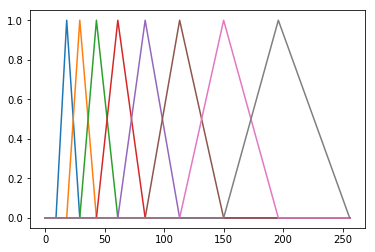

In [109]:
def mel(f):
    return 1125 * np.log(1 + f / 700)

# convert back into freq
def mel_to_freq(m):
    return 700 * (np.exp(m / 1125) - 1)

num_filter = 10

lower_bound = 300
upper_bound = 8000

lower_mel = mel(lower_bound)
upper_mel = mel(upper_bound)


MEL = np.linspace(lower_mel, upper_mel, num=num_filter)
HERTZ = mel_to_freq(MEL)
fft_bins = np.floor(513 * HERTZ / sampling_frequency)

poopoo = []

for m in range(1, num_filter-1):
    H_m = []
    h_m = 0
    
    for k in range(0, 257):
        if (k >= fft_bins[m - 1] and k <= fft_bins[m]):
            h_m = (k - fft_bins[m - 1]) / (fft_bins[m] - fft_bins[m - 1])
        elif (k >= fft_bins[m] and k <= fft_bins[m + 1]):
            h_m = (-k + fft_bins[m + 1]) / (fft_bins[m+1] - fft_bins[m])
        else:
            h_m = 0
        H_m.append(h_m)
    poopoo.append(H_m)
            
for p in poopoo:
    plt.plot(p)








